# Week 1 Lab

## Question 1

You study the mutual friendship links in your Karate club, when you notice the following: Any set of two people from the club have exactly one friend in common. What does this tell you
about the club? Sketch the friendship network on paper for a club with 15 members. Once you have done that, you should be able to guess which of the NetworkX community graph generators corresponds to it. 

**Write the code to generate the friendship network for the club.**

This is a classic problem in graph theory known as the **Friendship Theorem** (proven by Erdős, Rényi, and Sós in 1966). If every pair of people in a group has exactly one common friend, the network structure is very specific: there must be one "central" person who is friends with everyone else, and everyone else is organized into pairs of friends. This forms a Windmill Graph.

**It tells you that the club has a "Hub and Spoke" or "Star-Triangle" architecture.** There is one "VIP" or "Central Leader" (let's call them Node 0). Every other member is part of a unique triangle that includes the leader. Aside from the leader, no one has any friends outside of their specific 3-person clique.

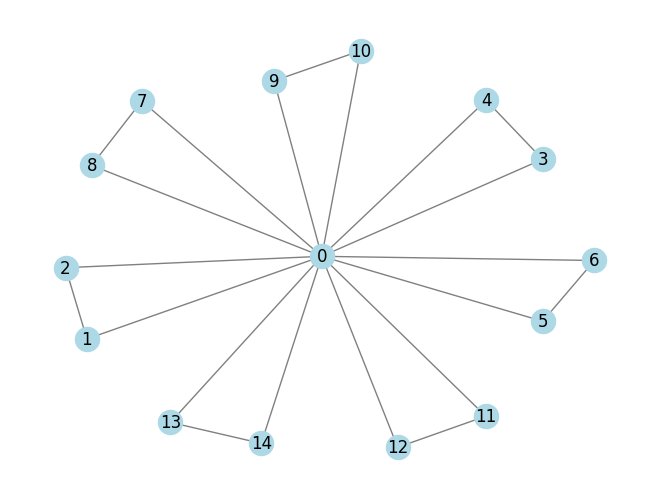

Nodes: 15
Is connected: True


In [25]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.windmill_graph(7, 3)

pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray')
plt.show()

print(f"Nodes: {G.number_of_nodes()}") # Should be 15
print(f"Is connected: {nx.is_connected(G)}")

**What is a windmill graph?**

A windmill graph, denoted as $Wd(n, k)$, is a specific type of undirected graph constructed by taking $n$ copies of a complete graph $K_k$ (a clique where every node is connected to every other node) and joining them all at a single, shared central vertex. In simpler terms: it looks like a collection of triangles (or larger shapes) that all "pinch" together at one middle point, like the blades of a windmill.

Mathematically, the **Friendship Graph/Theorem** requires an odd number of nodes to be constructed. This is because you must can `n` number of pairs plus the center node, hence, however many pairs there are, the total nodes must be odd.

In NetworkX the arguments taken are `(n,k)` where `n` is the number of cliques and `k` is the size of the cliques, therefore, it is impossible accidentally generate a graph with the wrong number of nodes.

It should be noted, the the **Friendship Graph** is a specific type of **Windmill Graph** where `k=3`. A Windmill Graph as a structure can have any number of `k` (blades), it just matters that each cluster connects to a central node. 

Also, by definition, each blade cluster must be a fully connected network, this is known as a **clique**. Therefore a Windmill Graph has two strict definitions: Intra-Blade Connectivity (High/Complete) & Inter-Blade Connectivity (Low/Sparse/Single).

If the blades were not fully interconnected then the type would be something like a "flower" or "catcus" graph. This is not just a semantics issue, a windmill graph as a very high **Clustering Coefficent**, this makes a popular model for social networks where "bubbles" knows eachother but are only linked elsewhere through a hub structure. 

**What is a spring layout?**

`nx.spring_layout(G)` is an algorithm that calculates a position (x, y coordinate) for every node to make the graph look visually organized and readable. In NetworkX, nodes don't inherently have "coordinates." If you just tell the library to draw a graph, it has no idea where to place the dots on your screen.

**How to Automatically Generate `n` and `k`?**

Recall, `(n,k)` where `n` is the number of cliques and `k` is the size of the cliques.

In the example above we pre-calculated that if we have 15 nodes then we need to have 7 cliques of 3 sized triangles to satisfy our task. `k` equals `3` need to be hardcoded. This is because to satisfy "any set of two people from the club have exactly one friend in common" it must be a triangle. 

For `n`, we know that the structure must have a central person. Given this, we know that the remainder of the triangle must coppucy two more people, therefore, we just need to take the total codes minus the central and divide by two: `(total_members - 1) // 2`

In [48]:
def generate_friendship_tuple(total_members):
    """
    Given a number of total nodes, compute how many cliques are needed given a clique size. 
    """
    if total_members % 2 == 0:
        raise ValueError("Friendship Theorem must be odd")
    
    num_triangles = (total_members - 1) // 2
    
    return (num_triangles, 3)

In [49]:
friendship_tuple = generate_friendship_tuple(15)
print(friendship_tuple)

(7, 3)


In [50]:
def plot_graph(graph):
    pos = nx.spring_layout(graph)
    nx.draw(graph, pos, with_labels=True, node_color='lightblue', edge_color='gray')
    plt.show()

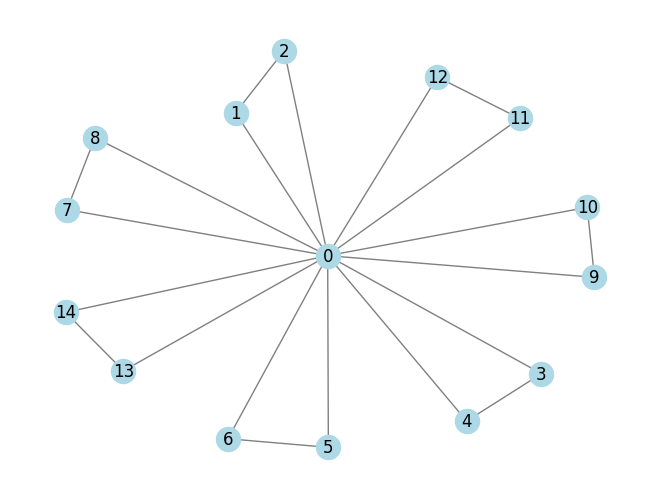

In [51]:
G = nx.windmill_graph(friendship_tuple[0], friendship_tuple[1])
plot_graph(G)

## Question 2

A connected simple graph has a mean degree of $𝑧 ≈ 1.9990123457$. The mean degree of an undirected network is given by $𝑘 = 2𝐿/𝑁$ where $𝐿$ is the number of links and $𝑁$ is the number of nodes. 

**What is the number of nodes?**

(hint: draw some ‘random’ networks to build an intuition as to what an average degree of less than 2 could mean; you could also consult some of the network databases mentioned in the first lecture and see what typical average degrees look like)

---

If the mean degree, given by $\langle k \rangle = \frac{2L}{N}$, is less than 2, then it must be a tree: $(L = N - 1)$

We can prove this by looking at the upper bound where mean degrees is 2. By rearranging the formaula we see that $L = N$, that is, the number of edges equals the number of nodes. Note, a stanard outcome for a grah of exactly 2 mean degrees is just a circle/loop (on average, it could be complex). To obtain an outcome less than 2, the number of edges must be less than the number of nodes. This by definition becomes a tree where $L = N-1$. A tree is the lowest form of network, we cannot have $L = N-2$ this would become disconnected.

$$\frac{2L}{N} = 2 \implies 2L = 2N \implies L = N$$

Given this we can substitue the numerator of the mean degrees equation from $L$ to $(N-1)$: 

$$1.9990123457 = \frac{2(N - 1)}{N}$$

To be a **connected graph**, you must have $L \geq N - 1$ and a shown about, to have a mean degrees of less than two $L < N$. The only thing that satisfies these two contstraints is $L = N - 1$. 

* If $L < N - 1$: Breaks the "connected" graph
* If $L = N$: Gives a mean degrees of 2 which is too high for our brief
* If $L > N$: Again forceds the mean degrees to be >2

Therefore, if we see a mean degrees of a connected graph which is $2<$, we know it is a **tree**. We can use simple algbra to unpack the dimensions of the tree graph. 

1. Set up the equation:

$$1.9990123457 = \frac{2N - 2}{N}$$

2. Multiply both sides by $N$:

$$1.9990123457N = 2N - 2$$

3. Rearrange to solve for $N$:

$$2 = 2N - 1.9990123457N$$

$$2 = N(2 - 1.9990123457)$$

4. Subtract the decimals: 

$$2 = N(0.0009876543)$$

5. Divide to find $N$:

$$N = \frac{2}{0.0009876543}$$

$$N = 2025.0003...$$

Since the number of nodes must be an integer, we round to the nearest whole number:
$N = 2025$

This means the tree has $2025$ Nodes, and therefore has $L = N-1 = 2025-1 = 2024$ edges. 

$$\frac{2 \times 2024}{2025} = \frac{4048}{2025} \approx 1.999012345679...$$

It should be noted, that while every tree has a mean degree below 2. All trees have a unique mean degreee which means we can map every tree to a mean degree and the reversal. The mean degree behaves as an identifer. This is only possible because me were able to substitute $L$ for $N-1$ in the formula. It is not possible to do this mapping for connected networks that are not trees, i.e. with a mean degree $>2$. 

For any tree the mean degree is $\langle k \rangle = \frac{2(N-1)}{N}$ which can be rearranged and simplified to $\langle k \rangle = 2 - \frac{2}{N}$

This is how mean degree varies with size. Close to 1  = the smaller the tree, Closer to 2 = larger tree: 

| Number of Nodes $(N)$ | Calculation $(2−\frac{N}{2}​)$ | Mean Degree $(⟨k⟩)$ |
| :--- | :--- | :--- |
| $2$         | $ 2-\frac{2}{2} $         | $1.0$ |
| $4$         | $ 2-\frac{4}{2} $         | $1.5$ |
| $10$        | $ 2-\frac{10}{2} $        | $1.8$ |
| $100$       | $ 2-\frac{100}{2} $       | $1.98$ |
| $2025$      | $ 2-\frac{2025}{2} $      | $1.999012...$ |
| $1000000$   | $ 2-\frac{1,000,000}{2} $​ | $1.999998...$ |




# Question 2: The Friendship Paradox

The Friendship paradox [1] is the phenomenon that, on average, your friends have more friends than you (don’t feel bad about it, it’s a form of sampling bias). In this exercise, I am asking you to verify this empirically in random networks. So, please complete the following code skeleton (replace ... by either numbers and/or simple line of code).

[S. L. Feld, Why Your Friends Have More Friends Than You Do. American Journal of Sociology, 96 (1991) 1464–1477](https://doi.org/10.1086/229693)

> It is reasonable to suppose that individuals use the number of friends that their friends have as one basis for determining whether they, themselves, have an adequate number of friends. This article shows that, if individuals compare themselves with their friends, it is likely that most of them will feel relatively inadequate. Data on friendship drawn from James Coleman's (1961) classic study The Adolescent Society are used to illustratite the phenomenon that most people have fewer friends have. The logic underlying the phenomenon is mathematically explored, showing that the mean number of friends of friends is always greater than the mean number of friends of individuals. Further analysis shows that the proportion of individuals who have fewer friends than the mean number of friends their own friends have is affected by the exact arrangement fo friendships in a social network. This disproportionate experiencing of friends with many friends is related to a set of abstractly similar "class size paradoxes" that includes such diverse phenomena as the tendencies for college students to experience the mean class size as larger than it actually is and for people to experience beaches and parks as more crowded than they usually are."

Average degree of nodes: 25.06
Average degree of friends: 25.93


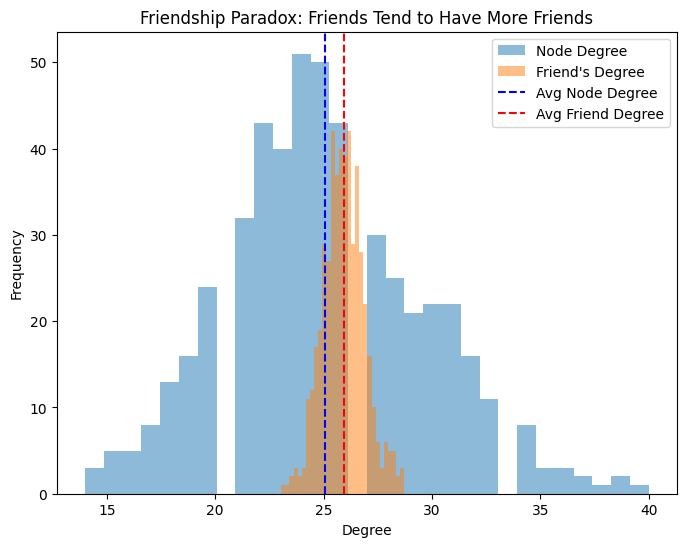

In [266]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Generate a random graph.
# Here we will use a particular form of random graphs called Erdős-Rényi.
# We will discuss this model in a forthcoming lecture.

n = 500 # Number of people (nodes)
p = 0.05 # Probability of forming a friendship (edge)
G = nx.erdos_renyi_graph(n, p)

# Step 2: Compute degrees of all nodes
degrees = [val for (node, val) in G.degree()]

# Step 3: Compute average neighbor degree for each node
neighbor_degrees = []
for node in G.nodes(): # Node ID
    friends = list(G.neighbors(node)) # iterator if IDs
    if friends:
        # Calculate the mean degree of all nodes in the 'friends' list
        avg_friend_degree = np.mean([G.degree(f) for f in friends])
    else:
        avg_friend_degree = 0
    neighbor_degrees.append(avg_friend_degree)

neighbor_degrees = np.array(neighbor_degrees)

# Step 4: Compute averages E[k]
overall_avg_degree = np.mean(degrees)
overall_avg_friend_degree = np.mean(neighbor_degrees)

print(f"Average degree of nodes: {overall_avg_degree:.2f}")
print(f"Average degree of friends: {overall_avg_friend_degree:.2f}")

# Step 5: Visualization
plt.figure(figsize=(8, 6))
plt.hist(degrees, bins=30, alpha=0.5, label="Node Degree")
plt.hist(neighbor_degrees, bins=30, alpha=0.5, label="Friend's Degree")
plt.axvline(overall_avg_degree,
color='blue', linestyle='dashed', label="Avg Node Degree")
plt.axvline(overall_avg_friend_degree,
color='red', linestyle='dashed', label="Avg Friend Degree")
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.legend()
plt.title("Friendship Paradox: Friends Tend to Have More Friends")
plt.show()


 <u> **What is the mathmatical intution here?** </u>

In a random network, the average degree of a node is simply the expected value $E[k]$. However, the average degree of a neighbor is biased by the degree squared.

$$\mu_{neighbor} = \frac{\langle k^2 \rangle}{\langle k \rangle} = \langle k \rangle + \frac{\sigma^2}{\langle k \rangle}$$

Because the variance $\sigma^2$ is almost always positive, the average degree of a friend will strictly be greater than the average degree of the nodes themselves.

---


<u> **What do we mean when we say, if we the average degree of a node is simply the expected value $E[k]$?** </u>

If you walk into a room of $n$ people and pick one person at random, the "Expected Value" ($E[k]$) is simply the average number of friends a person has in that room. 

In an Erdős-Rényi graph, every possible friendship (edge) has the same probability $p$. Therefore:
- Each node has a potential of $nodes-1$ (removing themselves)
- The prob of having an edge to any other node is: $p$
- The Expected Degree is simply $E[k] = (n-1) \times p$. If you repeat this "pick a random person" experiment 1,000 times, the average of their friend counts will be very close to this number.

---

<u> **The Friendship Paradox** </u>

The Friendship Paradox arises because "your friends" are not a random sample of the population. Imagine a "Social Butterfly" who is friends with everyone in the room, and a "Wallflower" who has only one friend (the Social Butterfly). If you pick a person at random, you are just as likely to pick the Wallflower as the Social Butterfly. However, if you pick a "friend" of someone, you are drastically more likely to pick the Social Butterfly. In fact, in this scenario, every single person who has a friend is friends with the Social Butterfly. 

Because popular people (high-degree nodes) have so many friends, they show up in everyone else's "friend list." **They are over-represented when we calculate the "average degree of a friend."**

---

<u> **Methods of Averaging** </u>

In the lab, you are comparing two different ways of averaging:
* Node Average: $\frac{1}{n} \sum (\text{degrees of all nodes})$
* Neighbor Average: The average of the degrees of every person's friends.

It should be highlighted that the Neighbour Average calculation is a global figure. It doesn't represent a single neigbour but instead "every" neighbour. In fact whenever we talk about Expected Value, this is a mean representing the entire population. To calculate this, we take square of all nodes degrees over the actual node degrees.

There are two ways to approach this calculation using the Expected Values/Means or using the summations. Mathematically they are identical. 

Here we calculating the Neighbour Average using global expected values. The Numerator is calculated as ($E[k^2]$): $\frac{\sum k_i^2}{N}$. It is the average of the squared values $E[k^2]$, which are the number friends (edges) a node has. Note, that this is not the average, squared $(E[k])^2$ 

$$E[k_{neighbor}] = \frac{E[k^2]}{E[k]}$$

Expected Value $E[k]$ is just the sum of all values divided by the total number of items ($N$). Mathematically, these $N$ values cancel eachother out and we are left with the summations:

$$E[k_{neighbor}] = \frac{\sum k_i^2}{\sum k_i}$$

---

<u> **Average Mathmematical Reasoning** </u>

This is the mathmatical respresentation behind why the "Average Degree of Friends" will almost all be higher than the "Average Degree of Nodes". 

The Denominator is the average degree of all nodes in the network. If you pick a person at random, this is how many friends you expect them to have. It is a normalization term for all edges (friendships) in the network. 

The Numerator is the average of the squared values. To get this number, you don't look at your friends yet. You look at every node in the whole network, square their degree, and then average those results. We are squaring the individual values because we want to amplify popular nodes because they are over sampled in any distribution due to being popular. Larger values will increase more when squared than lower ones. 

---

<u> **Popular Friend Intuition** </u>

Imagine a small group where: User A has 2 friends. User B has 10 friends (a "hub"). If we just average them ($E[k]$), the hub is only 5 times more significant than User A ($10 / 2 = 5$). 

But when we look at the Average of the Squares ($E[k^2]$): User A contributes $2^2 = \mathbf{4}$. User B contributes $10^2 = \mathbf{100}$. Now, the hub is 25 times more significant than User A ($100 / 4 = 25$).

A person with 10 friends is 10 times more likely to be "your friend" than someone with 1 friend. When you do find that person, they bring a value of 10 (their degree) to your "Average Degree of Friends" calculation. $10 \times 10 = 10^2$. The math is simply capturing the fact that high-degree nodes are both easier to find and heavier to count.

---

<u> **Toy Example** </u>

| Node | Degree (k) | Degree Squared (k2) |
| ---: | ---: | ---: |
| Alice | 1 | 1 |
| Bob | 10 | 100 |
| Charlie | 1 | 1 |
| Sum | 12 | 102 |
| Average (E) | 4 | 34 |

The denominator is simply the average degree ($E[k]$) of the nodes in the network. Alice has 1 friend, Bob has 10 friends, Charlie has 1 friend. Total friends: $1 + 10 + 1 = 12$. The total people is $3$ therefore the denominator ($E[k]$) is $12 / 3 = \mathbf{4}$. 

For the numerator we square all of the values (the far column), sum them and take the average. If we take the numerator (34) and divide it by the denominator (4):

$$\text{Average Degree of a Neighbor} = \frac{34}{4} = \mathbf{8.5}$$

---

<u> **Why do we square the individual degrees?** </u>

After we square the values, sum and average, we get a value of 34. This value is an intermediate mathematical step as its exists on a plane that isn't scaled to reality. However, it holds the information that respresents our popular friends intution. The value holds the total "popularity energy" but it is measures in a squared dimension. 

Think of 34 as a "raw score" that hasn't been scaled back down to reality yet. It’s a mathematical intermediate step. The 34 (the numerator) represents the total "popularity energy" in the room, but it’s measured in squared friends. 

To get the number back to something that is intelligible, we divide by the average degree of the total network. Recall that the base values that when into the square where also just the same values that when into the degree, therefore, divding it scales it down a step. 

Resultingly, 8.5 is the "proxy" or estimate for how many friends your friends have. 

| Metric | Value | Meaning |
| ---: | ---: | ---: |
| E[k] | 4 | "If I pick a person at random, they have this many friends." |
| E[k2] | 34 | "The ""Amplified"" popularity of the network." |
| E[k2]/E[k] | 8.5 | "If I pick a friend at random, they have this many friends." |

---

<u> **The influence of variance** </u>

In the input to both average calculations are the same, i.e. each nodes degrees. At first glance, it may appear that dividing the average of common inputs by another average should reverse the calculation and give us back our inputs, or at least a global value respresenting the raw inputs. 

However, the average of the squares will always be greater (or equal) to the square of the average. This is due to the variance of the inputs. Variance from the mean is amplified when squared. 

Because of this, when you divide the amplified popularity of the network by the networks degree average, you will always get a value more than 1, i.e. Amplified > Average. This means that your friends, on average, will be more popular than you. 

---

<u> **Final Intution: Picking Friend at Random** </u>

Imagine you are looking at a "List of every friendship in the city." Alice’s name appears once on that list. Bob’s name appears ten times on that list.

If you close your eyes and point to a name on that list, you are 10 times more likely to point at Bob than Alice. Because you are so much more likely to pick Bob, the "Average Friend" ends up looking much more like Bob (10 friends) than like Alice (1 friend).

The result, 8.5, is the mathematical way of saying: "Even though the average person only has 4 friends, the people who are actually out there being friends with others are, on average, much more popular."

---

<u> **Code and Mathematics Disconnect** </u>

In the math notation we formulate the neighbour average numerator as sum of the square values (friends degrees). In the code we don't explicity square anything but this is becaude the `**` is implicit in the loop. We loop through each node, we get each nodes friends, for each friend we get their degree (num of friends) and average this number. That number is then then put into a list for each `neighbor_degrees`. If there are 10 people in a room and every person knows the popular person "Bob" then their `k=10`. When you ask each person their number of friends that their friends have, "Bob" and their `k=10` shows up in each list. Because Bob has 10 friends, the number 10 appears in your global "neighbor degrees" list 10 times. 

**How does this create a square?**
Bob's degree is $k$. Bob is "reported" $k$ times. The total "contribution" Bob makes to the global sum is $k \times k$, which is $k^2$.

The squaring is a mathematical shortcut to describe this behavior. The code doesn't need to square the number because the structure of the network does the squaring for you by making popular people appear more often. Additionally, the formula $\frac{E[k^2]}{E[k]}$ only gives you one single number (the global average). But the loop creates an entire list of values (one for every node). This allows you to see the distribution. You will see that for almost every individual, the average degree of their friends is higher than their own degree.

```
neighbor_degrees = []
for node in G.nodes():
    friends = list(G.neighbors(node))
    if friends:
        avg_friend_degree = np.mean([G.degree(f) for f in friends])
    else:
        avg_friend_degree = 0
    neighbor_degrees.append(avg_friend_degree)
```

---

<u> *Histogram Analysis** </u>

The blue histrogram is the true distribution of the number of friends each node has. It represents the full spread of nodes and their "popularity"

The orange histogram is the distribution of averages. Each value is the average number of friends that your friends has. Therefore, its context is actually slightly different to the blue histogram. It appears much skinner and with a higher average than the true number of friends each node has. This is due to our popular friend paradox, thereby they keep being sampled in each persons list, pushing the distribution up. The reason that the distribution is skinnier is because it is an average of averages. The individual nodes are noise and distributed across all possible values. With an average there is a finite number of outcomes based on the possible inputs, hence the spread becomes more clustered. 